In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

# comparison betweem MC-BNB with DATA-cosmic overlay and MC-BNB with MC-cosmic overlay
### Sept. 12, 2017

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/MCbnbDATAcosmicVsMCbnbMCcosmic/'

# pairs of tracks at close proximity

In [3]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()
print 
MCbnbMCcosmicPairsFV, MCbnbMCcosmicSamples = load_MCbnbMCcosmicSamples()

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 12.6%
4001 are other pairs, 13.2%
22562 are cosmic, 74.3%
--------------------------------------------------------------
1234 are CC 1p 0pi, 4.1%

139258 pairs from MC-BNB + cosmic MC overlay
96025 pairs in FV
19649 are 1mu-1p, 20.5%
16331 are other pairs, 17.0%
60155 are cosmic, 62.6%
--------------------------------------------------------------
7586 are CC 1p 0pi, 7.9%


In [4]:
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers,pureff_MCbnbMCcosmic,pureff_MCbnbMCcosmic_numbers = apply_cuts(PIDa_p_min=10, delta_Delta_phi=40 ,Rmin = (0.,0.,0.))

## PIDa

In [5]:
def plot_diff_DATAcosmicVsMCcosmic_1d(var = 'PIDa_assigned_proton'
                                      ,x_label = r'$PID_a^{p}$'
                                      ,bins = np.linspace(0,30,50)
                                      ,fontsize = 25,figsize=(18,12)
                                      ,legend_subplots=[0,1,2,3],legend_loc=['best','best','best','best']
                                      ,mul=1):

    fig = plt.figure(figsize=figsize)
    for i,(pair_type,color,MClabel) in enumerate(zip(pair_types,MCcolors,MClabels)):
        ax=fig.add_subplot(2,2,i+1)
        ax.set_title(MClabel,y=1.02,fontsize=fontsize)
        for i_sample,(label,sample,ls) in enumerate(zip(['cosmic DATA overlay','cosmic MC overlay']
                                                        ,[MCbnbDATAcosmicSamples[pair_type],MCbnbMCcosmicSamples[pair_type]]                                                       
                                                        ,['-','--']
                                                       )):
            plt.hist(mul*sample[var],bins=bins,color=color,linestyle=ls,histtype='step',linewidth=3+i_sample,normed=1)
            plt.plot([0,0],[0,0],color=color,linestyle=ls,linewidth=3,label=label)
        set_axes(ax,x_label if i>=2 else ''
                 ,'normalized counts [a.u.]' if i==0 or i==2 else ''
                 ,do_add_grid=True
                 ,do_add_legend=True if i in legend_subplots else False, legend_loc=legend_loc[i] if i in legend_subplots else None
                 ,fontsize=fontsize)
    plt.tight_layout()

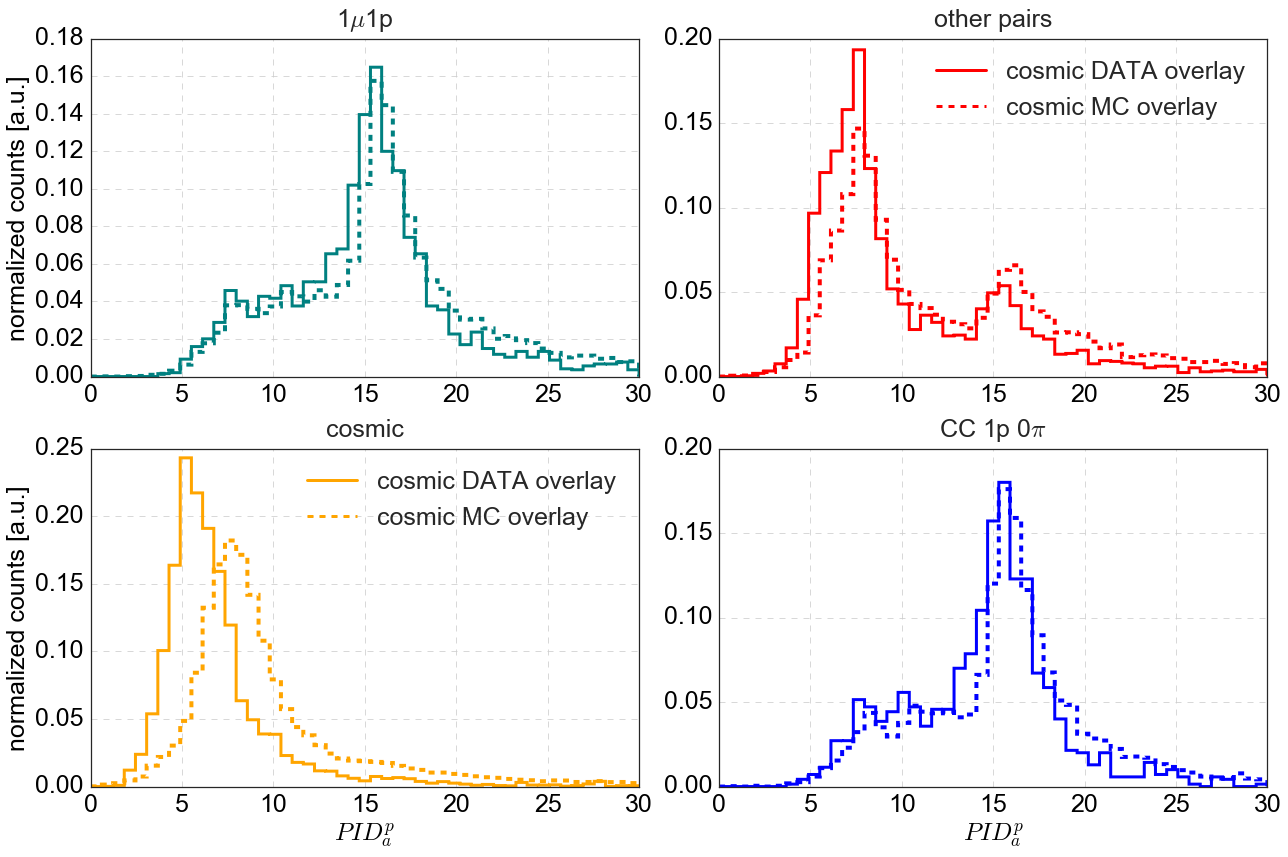

In [6]:
plot_diff_DATAcosmicVsMCcosmic_1d(var = 'PIDa_assigned_proton'
                                      ,x_label = r'$PID_a^{p}$'
                                      ,bins = np.linspace(0,30,50)
                                      ,legend_subplots=[1,2])

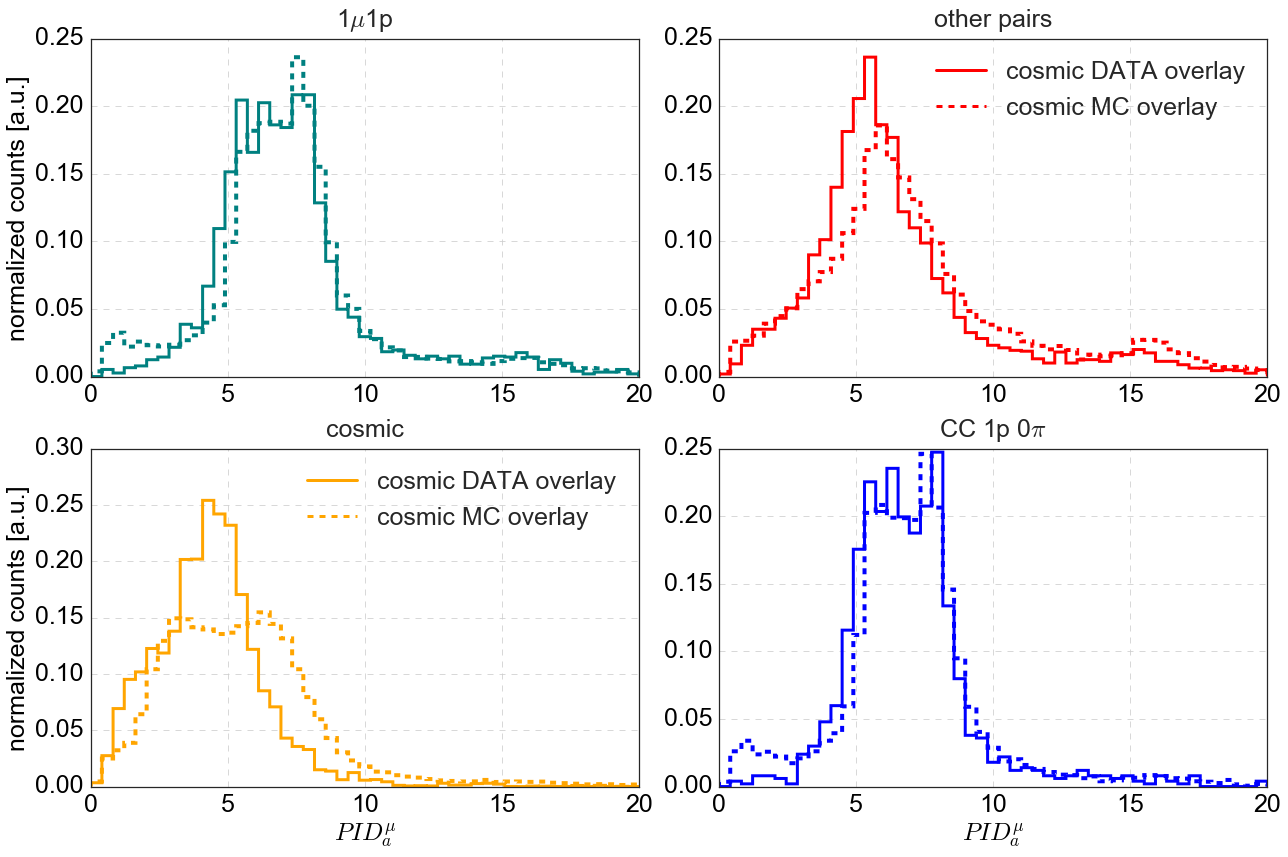

In [7]:
plot_diff_DATAcosmicVsMCcosmic_1d(var = 'PIDa_assigned_muon'
                                      ,x_label = r'$PID_a^{\mu}$'
                                      ,bins = np.linspace(0,20,50)
                                      ,legend_subplots=[1,2])

## track-length

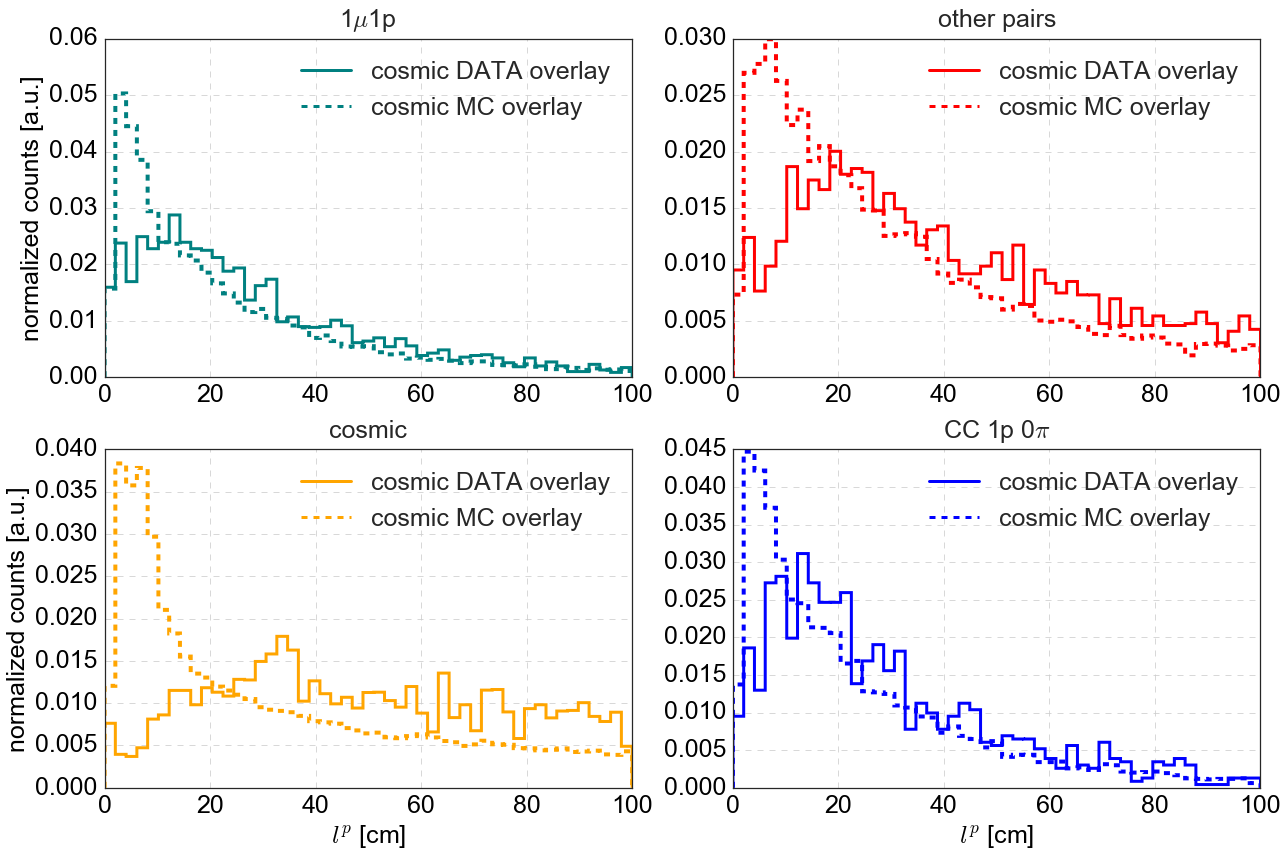

In [17]:
plot_diff_DATAcosmicVsMCcosmic_1d(var = 'l_assigned_proton'
                                      ,x_label = r'$l^{p}$ [cm]'
                                      ,bins = np.linspace(0,100,50)
                                      ,legend_subplots=[0,1,2,3])

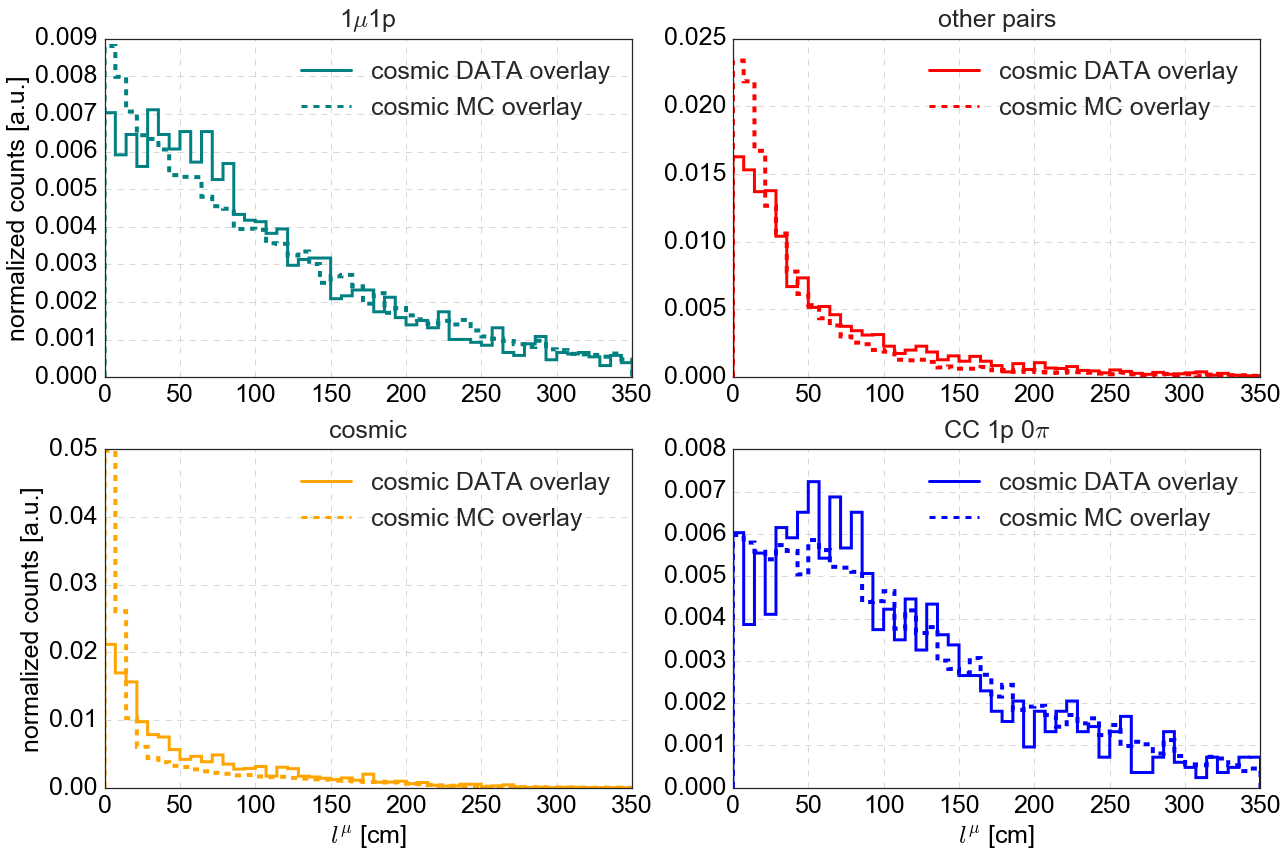

In [18]:
plot_diff_DATAcosmicVsMCcosmic_1d(var = 'l_assigned_muon'
                                      ,x_label = r'$l^{\mu}$ [cm]'
                                      ,bins = np.linspace(0,350,50)
                                      ,legend_subplots=[0,1,2,3])

## collinearity

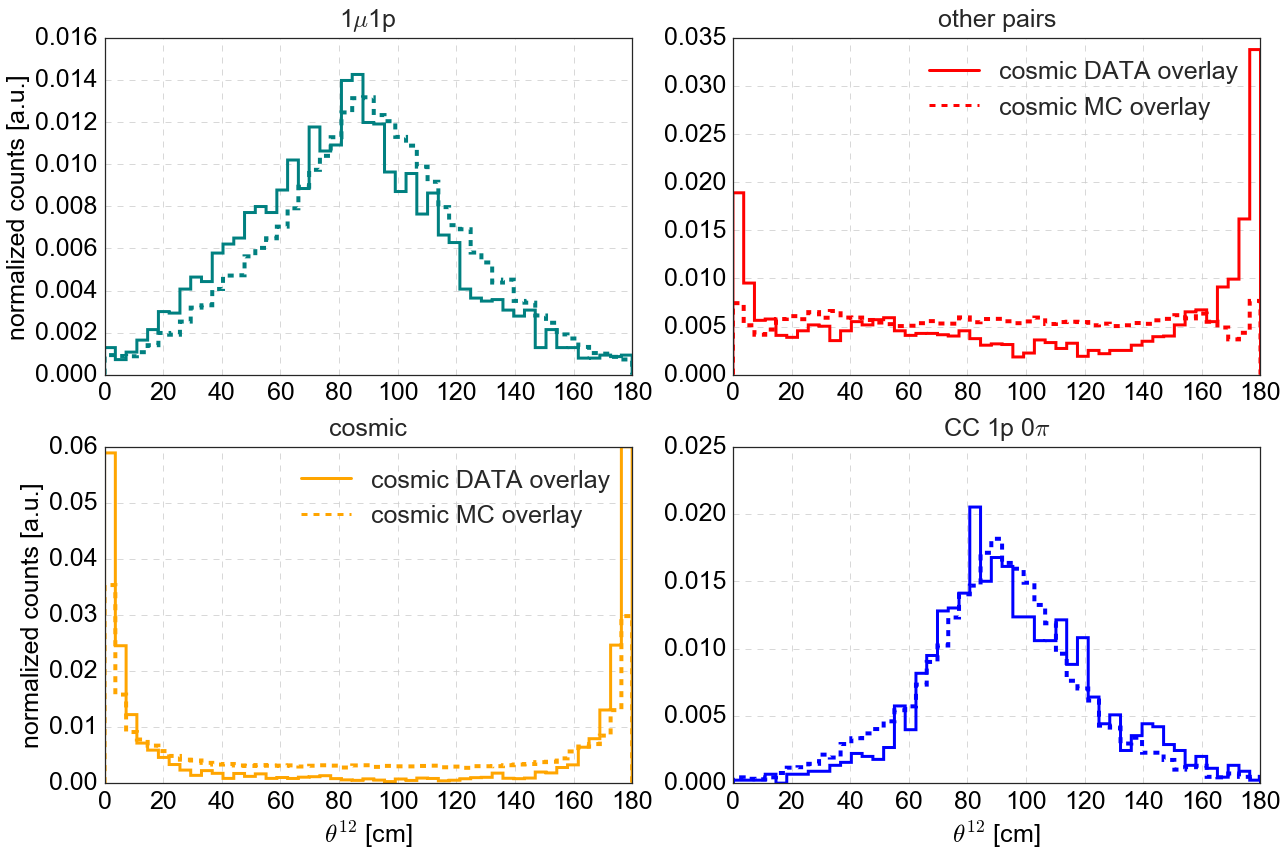

In [19]:
plot_diff_DATAcosmicVsMCcosmic_1d(var = 'theta_12'
                                      ,x_label = r'$\theta^{12}$ [cm]'
                                      ,bins = np.linspace(0,180,50)
                                      ,legend_subplots=[1,2])

## vertex activity

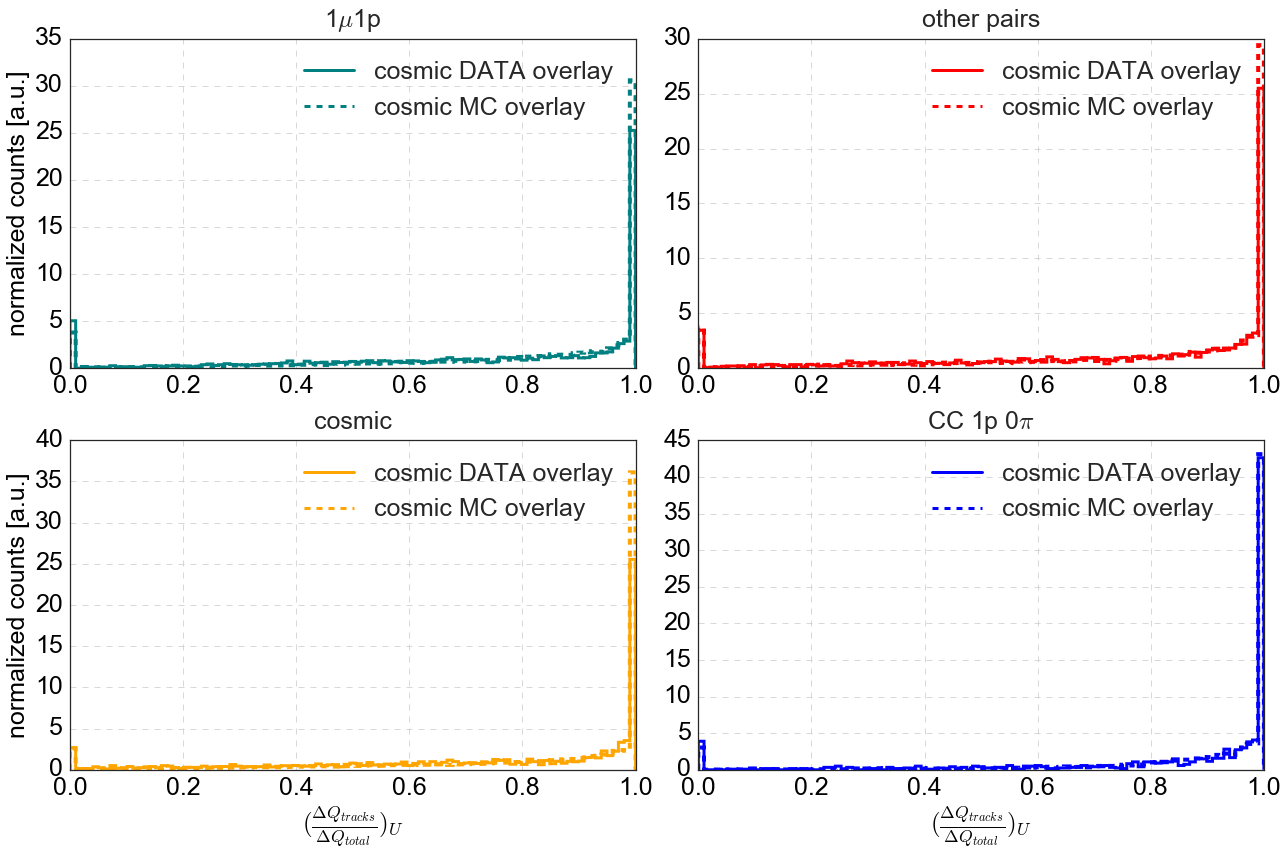

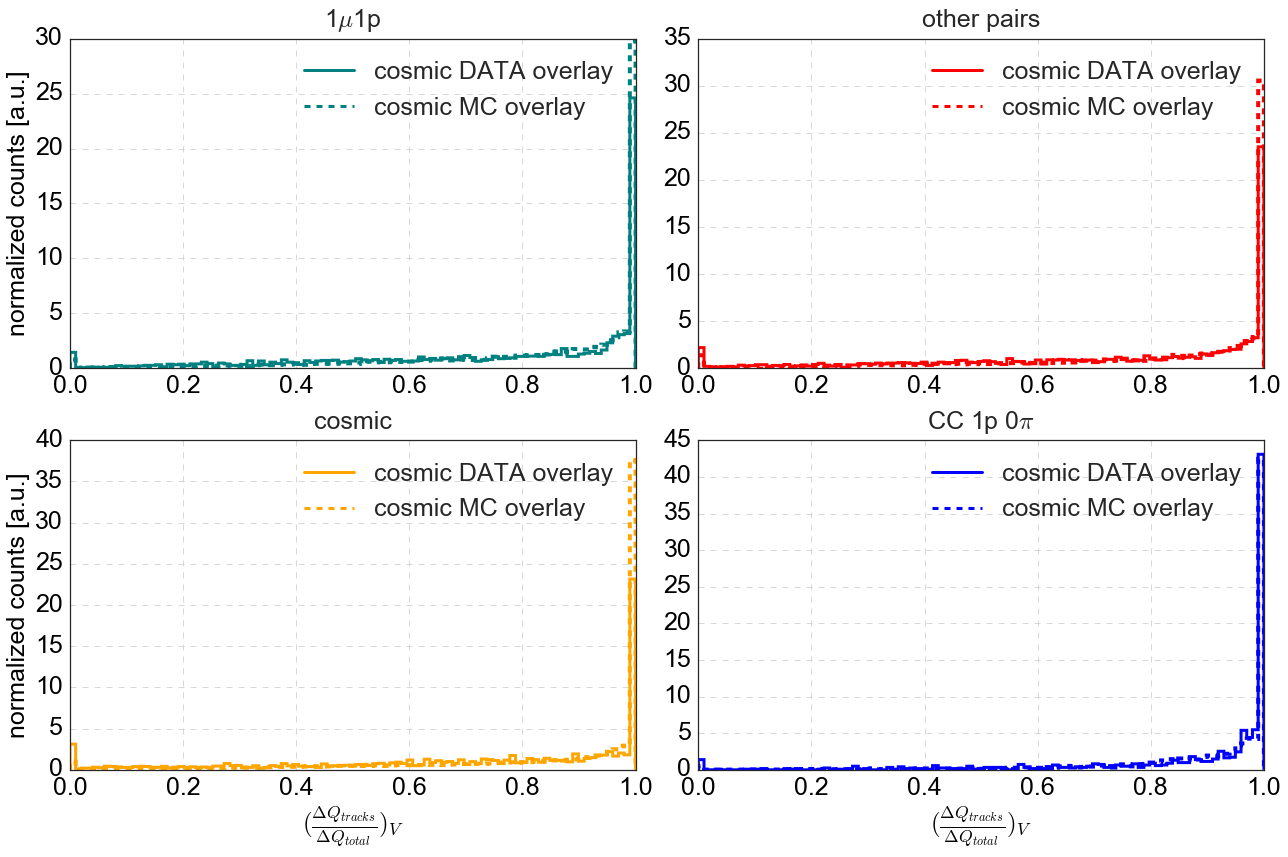

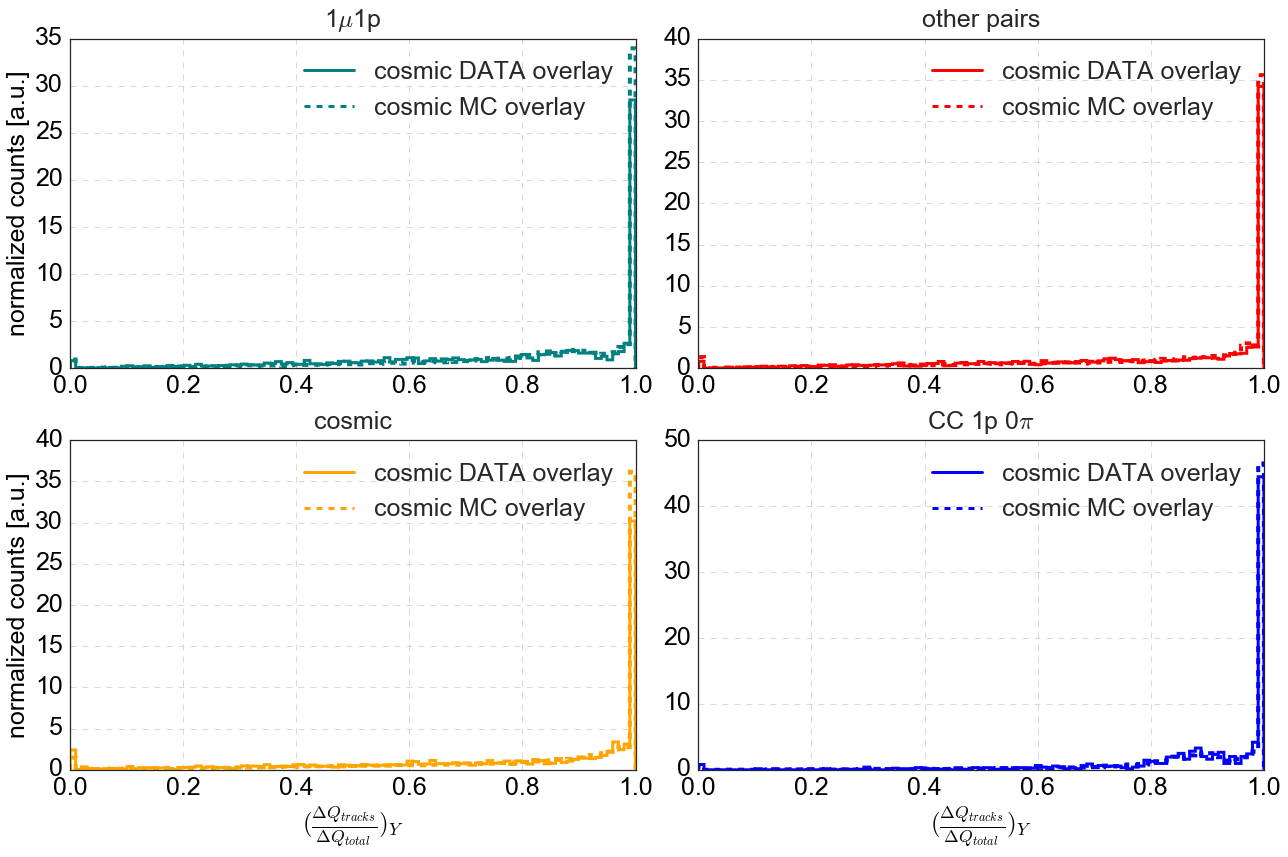

In [11]:
i_optimal_box_size=9
Ru = 'RdQaroundVertex[plane 0][50 wires x 100 ticks]'
Rv = 'RdQaroundVertex[plane 1][50 wires x 100 ticks]'
Ry = 'RdQaroundVertex[plane 2][50 wires x 100 ticks]'

plot_diff_DATAcosmicVsMCcosmic_1d(var = Ru ,x_label = r'$(\frac{\Delta Q_{tracks}}{\Delta Q_{total}})_U$'
                                      ,bins = np.linspace(0,1,100)
                                      ,legend_subplots=[0,1,2,3])
plot_diff_DATAcosmicVsMCcosmic_1d(var = Rv ,x_label = r'$(\frac{\Delta Q_{tracks}}{\Delta Q_{total}})_V$'
                                      ,bins = np.linspace(0,1,100)
                                      ,legend_subplots=[0,1,2,3])
plot_diff_DATAcosmicVsMCcosmic_1d(var = Ry ,x_label = r'$(\frac{\Delta Q_{tracks}}{\Delta Q_{total}})_Y$'
                                      ,bins = np.linspace(0,1,100)
                                      ,legend_subplots=[0,1,2,3])

## $\Delta \phi$

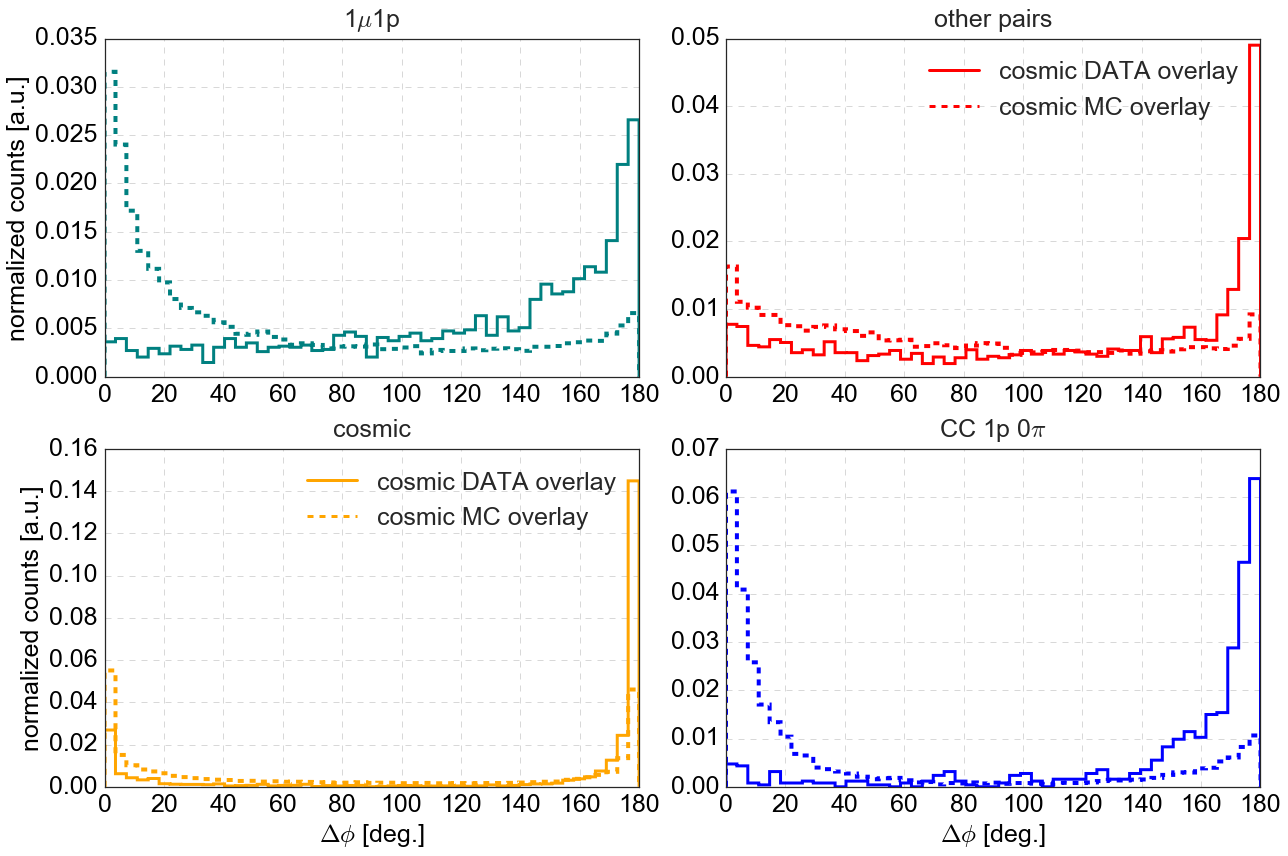

In [20]:
plot_diff_DATAcosmicVsMCcosmic_1d(var = 'delta_phi'
                                      ,x_label = r'$\Delta \phi$ [deg.]'
                                      ,bins = np.linspace(0,180,50)
                                      ,legend_subplots=[1,2])

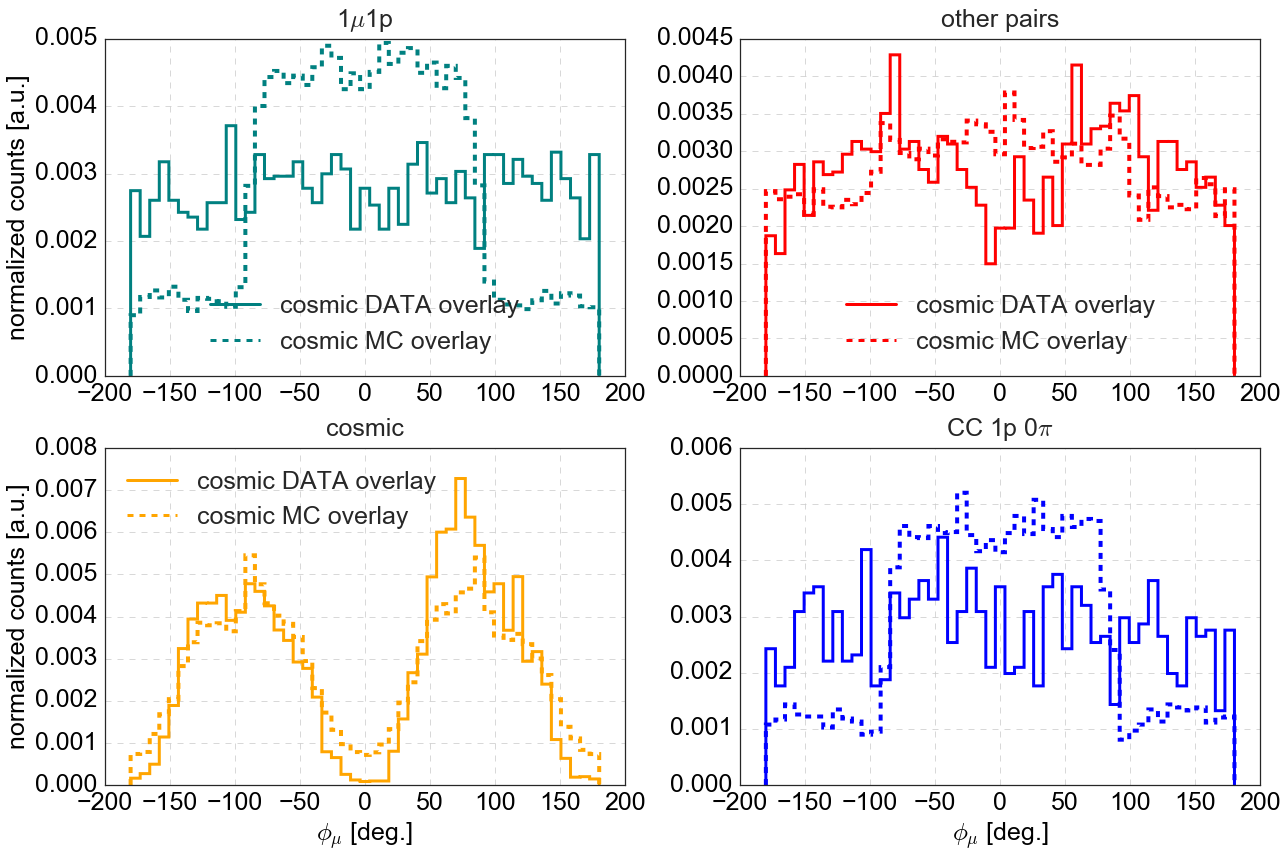

In [21]:
plot_diff_DATAcosmicVsMCcosmic_1d(var = 'reco_Pmu_phi',mul=180/np.pi
                                      ,x_label = r'$\phi_{\mu}$ [deg.]'
                                      ,bins = np.linspace(-180,180,50)
                                      ,legend_subplots=[0,1,2],legend_loc=['lower center','lower center','upper left'])

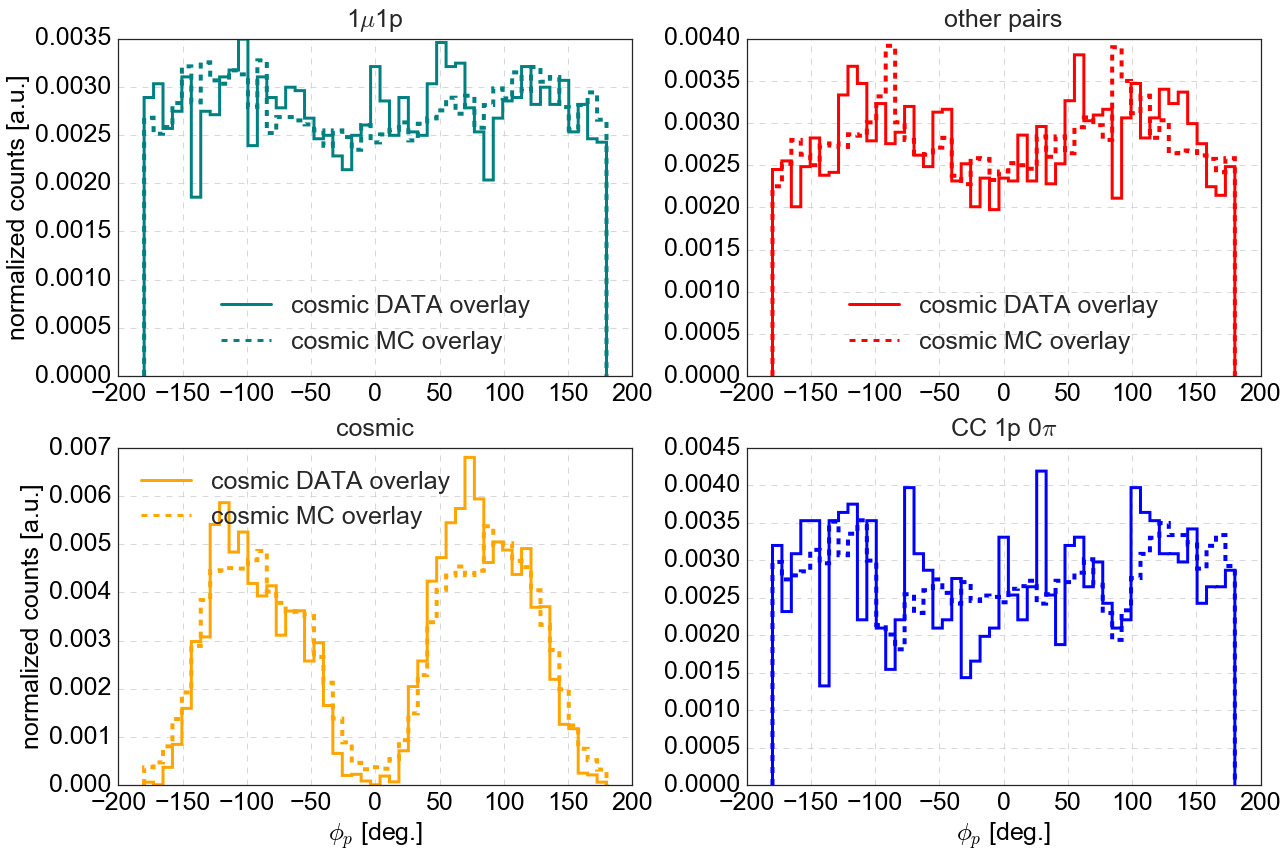

In [22]:
plot_diff_DATAcosmicVsMCcosmic_1d(var = 'reco_Pp_phi',mul=180/np.pi
                                      ,x_label = r'$\phi_{p}$ [deg.]'
                                      ,bins = np.linspace(-180,180,50)
                                      ,legend_subplots=[0,1,2],legend_loc=['lower center','lower center','upper left'])

## $\theta$

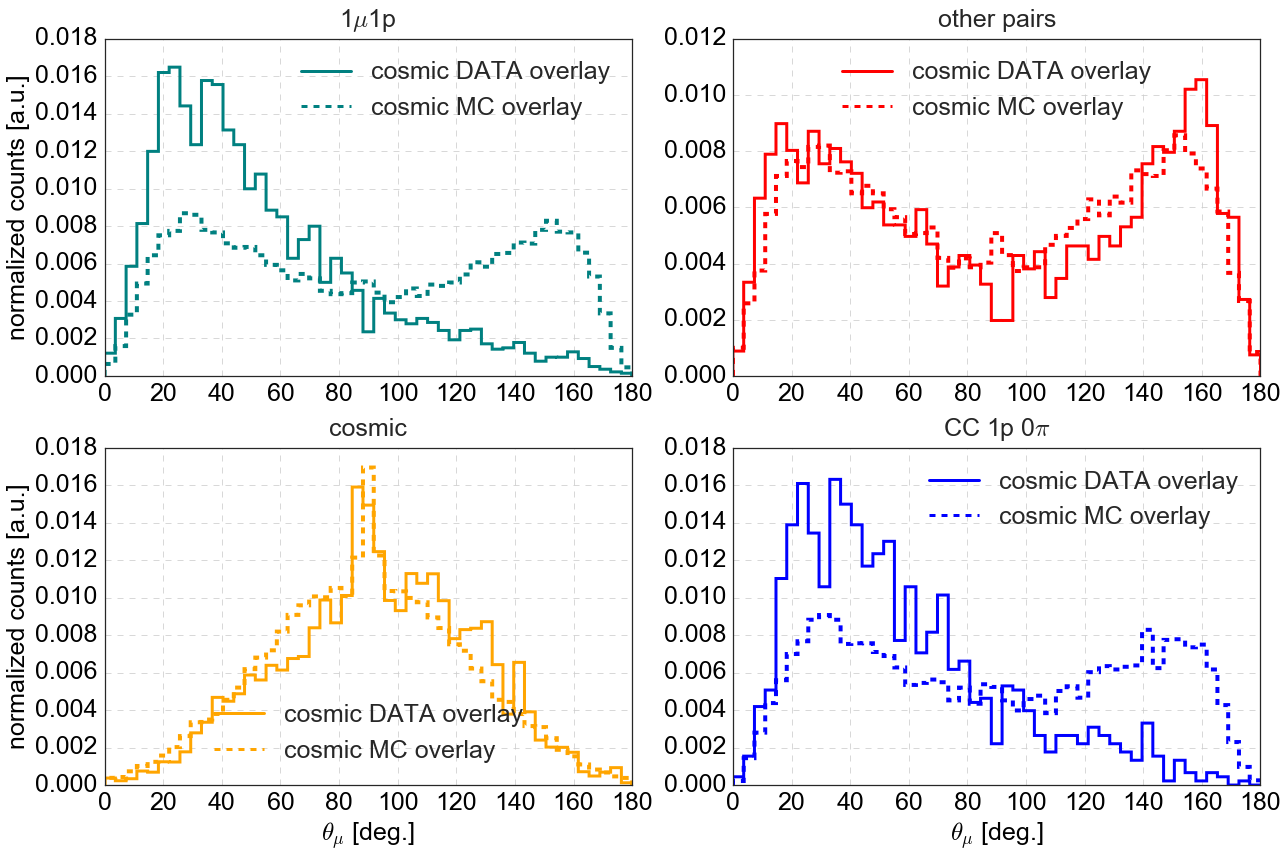

In [23]:
plot_diff_DATAcosmicVsMCcosmic_1d(var = 'reco_Pmu_theta',mul=180/np.pi
                                      ,x_label = r'$\theta_{\mu}$ [deg.]'
                                      ,bins = np.linspace(0,180,50)
                                      ,legend_subplots=[0,1,2,3],legend_loc=['upper right','upper center','lower center','upper right'])

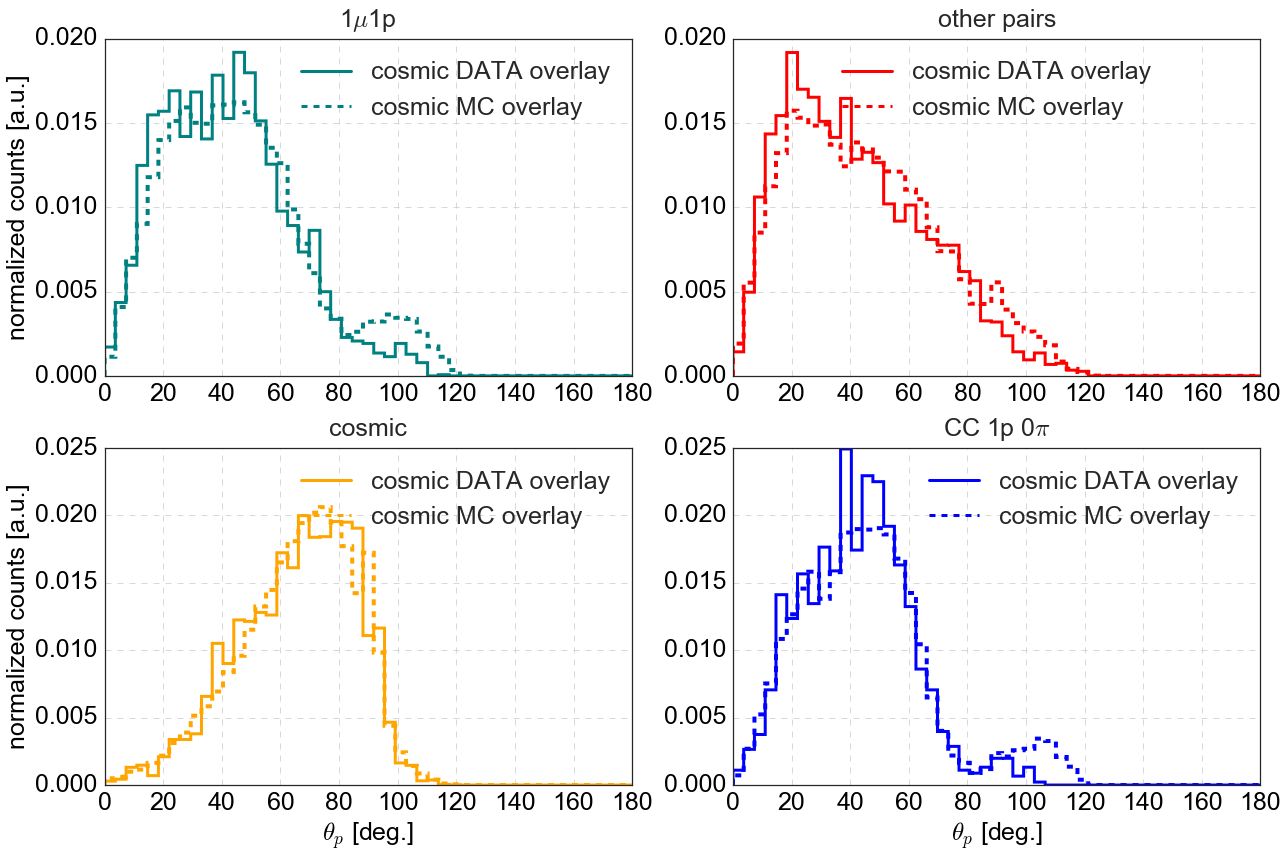

In [24]:
plot_diff_DATAcosmicVsMCcosmic_1d(var = 'reco_Pp_theta',mul=180/np.pi
                                      ,x_label = r'$\theta_{p}$ [deg.]'
                                      ,bins = np.linspace(0,180,50)
                                      ,legend_subplots=[0,1,2,3],legend_loc=['upper right','upper center','upper right','upper right'])